# INTRODUCTION TO IMPORTING DATA IN PYTHON

## Introduction and flat files

### Exploring your working directory

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\minek\\OneDrive - itu.edu.tr\\Projects\\Python\\Jupyter_Notebook'

In [8]:
os.chdir("C:\\Users\\minek\\OneDrive - itu.edu.tr\\Projects\\Python\\Jupyter_Notebook\\Files\\Import_Data_in_Python")

In [9]:
os.getcwd() ## Change directory that contains exercise files

'C:\\Users\\minek\\OneDrive - itu.edu.tr\\Projects\\Python\\Jupyter_Notebook\\Files\\Import_Data_in_Python'

In [10]:
wd = os.getcwd()
os.listdir(wd)

['albeck_gene_expression.mat',
 'a_movie.json',
 'battledeath.xlsx',
 'Chinook.sqlite',
 'data.pickle',
 'data.pkl',
 'digits.csv',
 'digits_header.txt',
 'disarea.dta',
 'latitude.xls',
 'LIGO_data.hdf5',
 'mnist_kaggle_some_rows.csv',
 'moby_dick.txt',
 'sales.sas7bdat',
 'seaslug.txt',
 'titanic.csv',
 'titanic_corrupt.txt',
 'tweets3.txt',
 'winequality-red.csv']

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

### Importing Text Files

In [12]:
file = open("moby_dick.txt", "r")

print(file.read())

print(file.closed)

file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

* For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the __readline()__ method, which allows you to do this. When a file called file is open, you can print out the first line by executing file.readline(). If you execute the same command again, the second line will print, and so on.

In [13]:
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



### Importing flat files using NumPy

<class 'numpy.ndarray'>


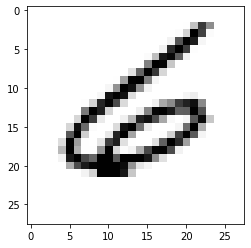

In [17]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=",")

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

#### Customizing your NumPy import

There are a number of arguments that **np.loadtxt()** takes that you'll find useful:

**delimiter** changes the delimiter that loadtxt() is expecting. <br>
+  You can use ',' for comma-delimited. <br> 
+  You can use '\t' for tab-delimited. <br> 

**skiprows** allows you to specify how many rows (not indices) you wish to skip. <br>
**usecols** takes a list of the indices of the columns you wish to keep.

In [25]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter="\t", skiprows=1, usecols=[0,2])

# Print data
print(data[5:8])

[[0. 0.]
 [7. 0.]
 [3. 0.]]


* Due to the header, if you tried to import it as-is using **np.loadtxt()**, Python would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument **dtype equal to str (for string).** Alternatively, you can skip the first row as we have seen before, using the **skiprows argument.**

['Time' 'Percent']
[0.    0.357]


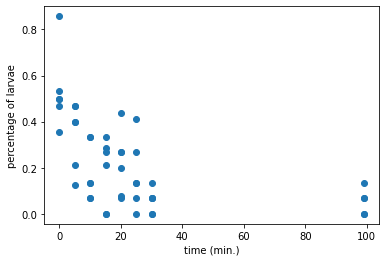

In [23]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

#### Working with mixed datatypes

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

In [30]:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

data[5]
# data["Survived"]   # Prints Survived Column

(6, 0, 3, b'male', nan, 0, 0, b'330877', 8.4583, b'', b'Q')

* There is also another function **np.recfromcsv()** that behaves similarly to **np.genfromtxt()**, except that its default dtype is **None.**

In [31]:
file = 'titanic.csv'

# You'll only need to pass file to it because it has the defaults delimiter=',' 
# and names=True in addition to dtype=None.

d = np.recfromcsv(file)
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


### Importing flat files using Pandas

In [9]:
import pandas as pd

file = 'titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# df["hey"] = df["Survived"] * df["Pclass"]
# df.to_csv("newwwww_titanic.csv")    ------>  Exporting Data as csv

print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [34]:
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows = 5, header = None)
data_array = np.array(data)
print(type(data_array))
print(data_array)

<class 'numpy.ndarray'>
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin    Embarked  
0         A/5 21171   7.2500   NaN  S #dfafdad  
1       PC 17599#to  71.2833   C85           C  
2  STON/O2. 3101282   7.9250   NaN           S  
3            113803  53.1000  C123           S  
4            373450   8.0500   NaN           S  


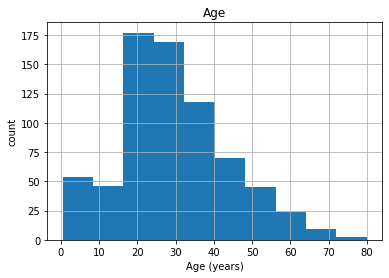

In [35]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep="\t", comment="#", na_values="Nothing")

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

## Importing data from other file types

### Loading a pickled file

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In [13]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', "rb") as file:   # "pkl" extension also may be "pickle"
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'x': [4, 2, 1.5, 1], 'y': [32, [101], 17], 'foo': True, 'spam': False}
<class 'dict'>


In [14]:
# To save file as pickle

# some_obj = {'x':[4,2,1.5,1], 'y':[32,[101],17], 'foo':True, 'spam':False}

# with open('myfile.pickle', 'wb') as f:  # ".pickle" or ".pkl"
#     pickle.dump(some_obj, f)

### Listing sheets in Excel files

In [10]:
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


In [11]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse("2004")

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [12]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=1, names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=1, names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


### Importing SAS/Stata files using pandas

* **SAS** --> Statistical Analysis System
* **Stata** --> "Statistic" + "Data"

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


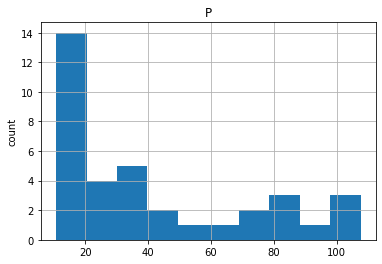

In [9]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

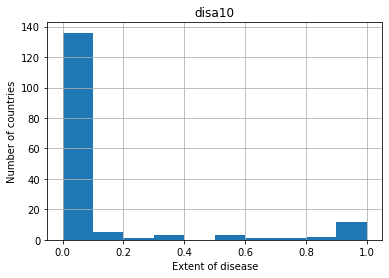

In [16]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

### Importing HDF5 files

In [10]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, "r")

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


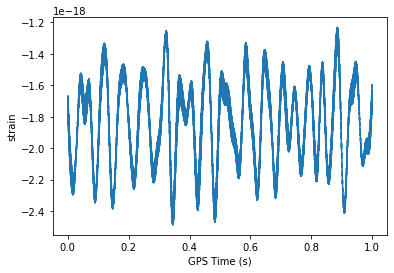

In [12]:
### Extracting data from your HDF5 file ###

# Get the HDF5 group: group
group = data["strain"]

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### Importing MATLAB files

In [15]:
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


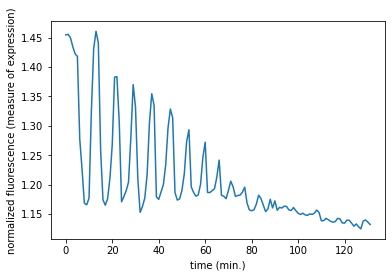

In [16]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

## Working with relational databases in Python

### Creating a Database Engine in Python

In [19]:
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### The Hello World of SQL Queries!

In [8]:
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


In [9]:
from sqlalchemy import create_engine
import pandas as pd

with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


### Filtering your database records using SQL's WHERE

In [10]:
# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


### Ordering your SQL records with ORDER BY

In [11]:
# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

### Querying relational databases directly with pandas

In [12]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


In [13]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


### INNER JOIN

In [14]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')


with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist ON Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


In [15]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')

df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  


# INTERMEDIATE IMPORTING DATA IN PYTHON

## Importing data from the Internet

### Importing flat files from the web

In [8]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Opening and reading flat files from the web

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

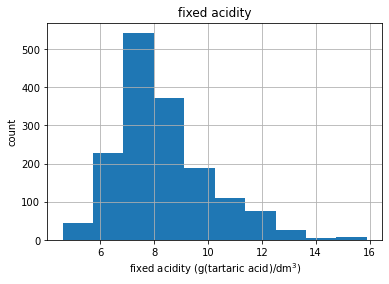

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep = ";")

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

### Importing non-flat files from the web

In [20]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'


# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name = None)

# Print the sheetnames to the shell
print(xls.keys())

# For space
print("")

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
 
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### Performing HTTP requests in Python using urllib

In [21]:
from urllib.request import Request,urlopen

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


### Printing HTTP request results in Python using urllib

In [22]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html><html lang="en"><head><link rel="apple-touch-icon-precomposed" sizes="57x57" href="/apple-touch-icon-57x57.png"><link rel="apple-touch-icon-precomposed" sizes="114x114" href="/apple-touch-icon-114x114.png"><link rel="apple-touch-icon-precomposed" sizes="72x72" href="/apple-touch-icon-72x72.png"><link rel="apple-touch-icon-precomposed" sizes="144x144" href="/apple-touch-icon-144x144.png"><link rel="apple-touch-icon-precomposed" sizes="60x60" href="/apple-touch-icon-60x60.png"><link rel="apple-touch-icon-precomposed" sizes="120x120" href="/apple-touch-icon-120x120.png"><link rel="apple-touch-icon-precomposed" sizes="76x76" href="/apple-touch-icon-76x76.png"><link rel="apple-touch-icon-precomposed" sizes="152x152" href="/apple-touch-icon-152x152.png"><link rel="icon" type="image/png" href="/favicon.ico"><link rel="icon" type="image/png" href="/favicon-196x196.png" sizes="196x196"><link rel="icon" type="image/png" href="/favicon-96x96.png" sizes="96x96"><link rel="icon" ty

### Performing HTTP requests in Python using requests

In [23]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta name="captcha-bypass" id="captcha-bypass" />
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<style type="te

### Parsing HTML with BeautifulSoup

In [24]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publicati

### Turning a webpage into data using BeautifulSoup: getting the text

In [25]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Sco

### Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In [26]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all("a")

# Print the URLs to the shell
for link in a_tags:
    print(link.get("href"))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## Interacting with APIs to import data from the web

### Loading and exploring a JSON

In [49]:
import json

with open("a_movie.json", "r") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

#  OR
# for k, v in json_data.items():
#     print(k + ": ", v)

Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Country:  USA
imdbVotes:  550,434
Rated:  PG-13
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Genre:  Biography, Drama
Response:  True
Released:  01 Oct 2010
Language:  English, French
DVD:  11 Jan 2011
Poster:  https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Production:  Columbia Pictures
Director:  David Fincher
Title:  The Social Network
imdbRating:  7.7
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Year:  2010
Metascore:  95
Type:  movie
Runtime:  120 min
Website:  http://www.thesocialnetwork-movie.com/
imdbID:  tt1285016
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter,

### API requests

In [3]:
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 171 wins & 184 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"618,421","imdbID":"tt1285

### JSON–from the web to Python

In [51]:
# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 171 wins & 184 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  618,421
imdbID:  tt1285016
Type:  movie
DVD:  N/

### Checking out the Wikipedia API

In [52]:
# Import package
import requests

# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 

# Diving deep into the Twitter API

## API Authentication

In [5]:
try:
    # Import package
    import tweepy

    # Store OAuth authentication credentials in relevant variables
    access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
    access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
    consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
    consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

    # Pass OAuth details to tweepy's OAuth handler
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

    auth.set_access_token(access_token,access_token_secret)
    
except:
    print("You need to get Twitter API credentials")

You need to get Twitter API credentials


## Streaming Tweets

In [2]:
try:
    # Initialize Stream listener
    l = MyStreamListener()

    # Create your Stream object with authentication
    stream = tweepy.Stream(auth, l)

    # Filter Twitter Streams to capture data by the keywords:
    stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])
except:
    print("You need to get Twitter API credentials")

You need to get Twitter API credentials


## Load and explore your Twitter data

In [11]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = "tweets3.txt"

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


## Twitter data to DataFrame

In [12]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=["text","lang"])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


## A little bit of Twitter text analysis

In [13]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [21]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    
print("Number of times 'Clinton' mentioned: ", clinton)
print("Number of times 'Trump' mentioned: ", trump)
print("Number of times 'Sanders' mentioned: ", sanders)
print("Number of times 'Cruz' mentioned: ", cruz)

Number of times 'Clinton' mentioned:  9
Number of times 'Trump' mentioned:  77
Number of times 'Sanders' mentioned:  6
Number of times 'Cruz' mentioned:  14


## Plotting your Twitter data

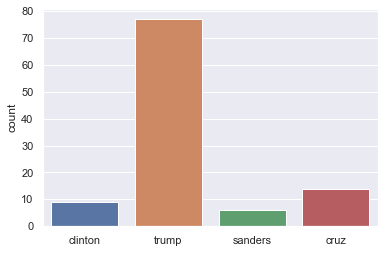

In [23]:
# Import packages
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton,trump,sanders,cruz])
ax.set(ylabel="count")
plt.show()